In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix

import os
import shutil
import random

In [2]:
physical_device = tf.config.experimental.list_physical_devices('GPU')
print(f'Num of GPU available: {len(physical_device)}')
if len(physical_device):
    tf.config.experimental.set_memory_growth(physical_device[0], True)

Num of GPU available: 0


In [3]:
mobileNet = tf.keras.applications.mobilenet.MobileNet()

In [4]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

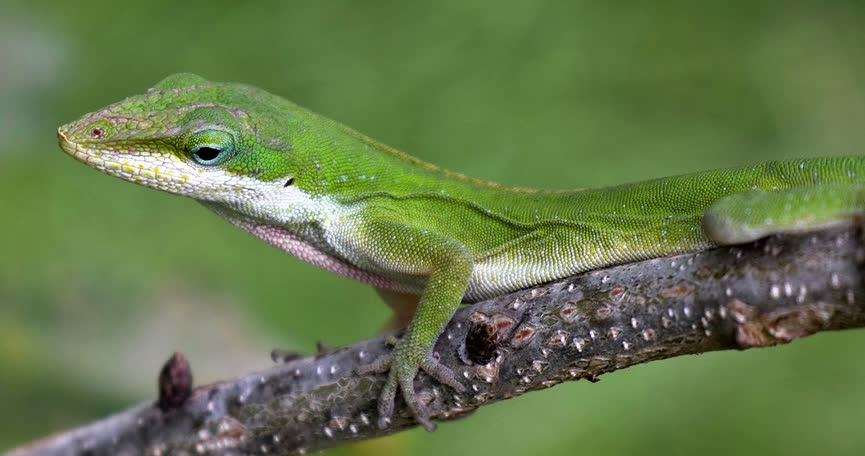

In [5]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/1.PNG', width=300, height=200)

In [6]:
preprocessed_image = prepare_image('1.PNG')
predictions = mobileNet.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01682714', 'American_chameleon', 0.6527469),
  ('n01693334', 'green_lizard', 0.18943301),
  ('n01687978', 'agama', 0.13799655),
  ('n01689811', 'alligator_lizard', 0.013600819),
  ('n01688243', 'frilled_lizard', 0.0043153027)]]

In [7]:
assert results[0][0][1] == 'American_chameleon'

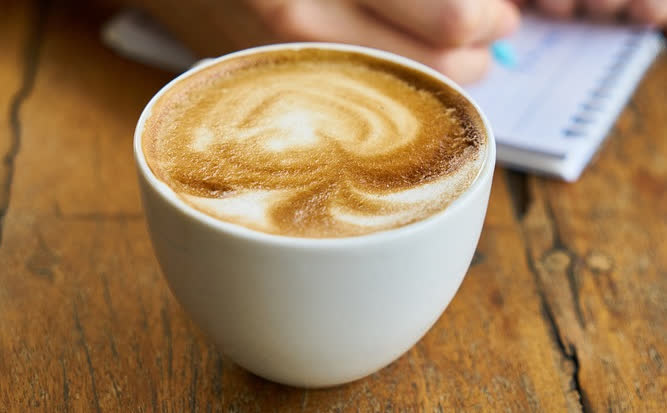

In [8]:
Image(filename='data/MobileNet-samples/2.PNG', width=300, height=200)

In [9]:
preprocessed_image = prepare_image('2.PNG')
predictions = mobileNet.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07920052', 'espresso', 0.9766625),
  ('n07930864', 'cup', 0.0100934915),
  ('n07932039', 'eggnog', 0.00859704),
  ('n03063599', 'coffee_mug', 0.0036651783),
  ('n04597913', 'wooden_spoon', 0.0004963663)]]

In [10]:
assert results[0][0][1] == 'espresso'

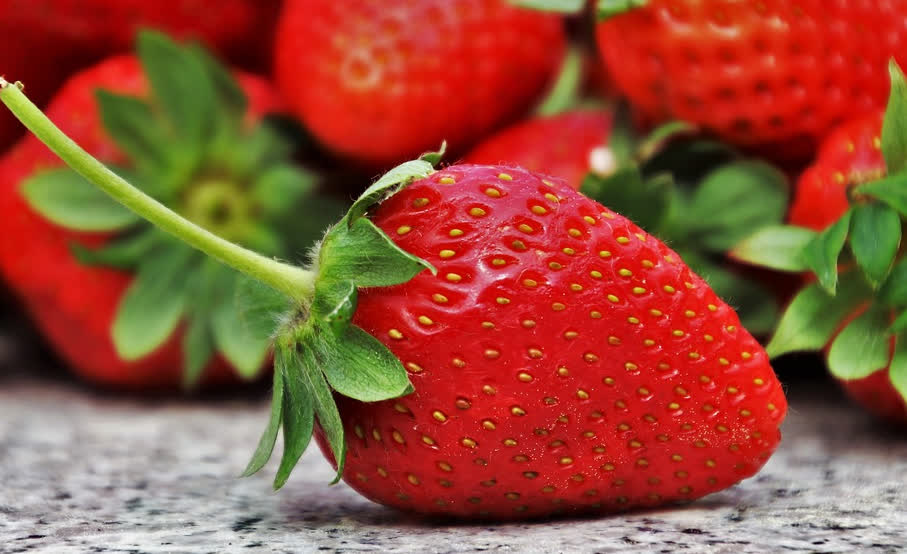

In [11]:
Image(filename='data/MobileNet-samples/3.PNG', width=300, height=200)

In [12]:
preprocessed_image = prepare_image('3.PNG')
predictions = mobileNet.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07745940', 'strawberry', 0.9999938),
  ('n07749582', 'lemon', 1.2442e-06),
  ('n07747607', 'orange', 8.602375e-07),
  ('n07753275', 'pineapple', 8.278158e-07),
  ('n07768694', 'pomegranate', 6.2610115e-07)]]

In [13]:
assert results[0][0][1] == 'strawberry'